# Partie 3

Dans cette partie on s'intéresse à la découverte de groupes d'utilisateurs partageant les même habitudes d'achats.

Premièrement nous allons importé notre dataset

In [2]:
import pandas as pd 

df = pd.read_csv('../data/df.csv')
df

,rating,user,item,price
0,5.0,A3QIWQM4HVNR0A,0971100764,12.96
1,5.0,A3QIWQM4HVNR0A,0971100764,12.96
2,5.0,A1M9XEAH62IUPW,0971100764,12.96
3,5.0,A2U7YP4MP7BICG,0971100764,12.96
4,2.0,AIFK4MYNSAW4D,0971100764,12.96
...,...,...,...,...
1459437,2.0,AW46USVHC6394,B01HJ8YC0Y,18.99
1459438,5.0,A1HCLZ57P6O0YM,B01HJDGJ1E,10.99
1459439,3.0,A2QTOTWE5ZRCZK,B01HJDGJ1E,10.99
1459440,5.0,A2NJSBP40UVZJ8,B01HJDGJ1E,10.99


### Proposer une définition de groupe (en fonction des attributs disponibles dans le dataset)

Dans le but de définir des groupes d'utilisateurs, nous allons dans un premier temps créer un dataset des utilisateurs, comprenant le prix moyen des produits achetés, le nombre de produits achetés et la moyenne des notes attribuées.

In [3]:
dfUser = df.groupby('user').agg({'price': ['mean', 'count'], 'rating': ['mean']}).reset_index()
dfUser.columns = ['user', 'price_mean', 'price_count', 'rating_mean']
dfUser

,user,price_mean,price_count,rating_mean
0,A0001528BGUBOEVR6T5U,42.143333,6,4.666667
1,A0024836TBQJ1WBE4VDY,94.500000,6,4.166667
2,A0029274J35Q1MYNKUWO,26.885000,20,4.800000
3,A0036244LFNO78OM4135,18.025000,4,5.000000
4,A0065811S4ANKB4TYHII,51.618000,5,4.200000
...,...,...,...,...
312279,AZZYW4YOE1B6E,7.837500,8,4.125000
312280,AZZZJJPHNUQ1T,71.200000,10,3.900000
312281,AZZZOVIBXHGDR,6.130000,3,4.333333
312282,AZZZPDCSVJ9X2,8.645000,8,5.000000


Nous allons ainsi séparer nos groupes en fonction de ces trois nouvelles colonnes.

Analysons maintenant notre colonne price_mean, qui représente la moyenne des prix des produits achetés par nos utilisateurs.

In [4]:
dfUser['price_mean'].describe()

count    312284.000000
mean         27.204452
std          29.507401
min           0.010000
25%          12.637500
50%          19.093333
75%          31.295000
max         999.990000
Name: price_mean, dtype: float64

On constate des prix moyens allant de 0,01 \$ à 999,99 \$, avec une moyenne de 27,20 \$. Nous allons ainsi séparer nos utilisateurs en 4 groupes : *Low*, *Medium*, *High* et *Very High*, représentant les utilisateurs achetant à un faible prix (entre 0 et 15 \$), moyen (entre 15 et 35 \$), élevé (entre 35 et 100 \$) ou très élevé (entre 100 et 1000 \$). Cette distribution des catégories est réalisée de manière arbitraire en fonction du pourcentage d'utilisateurs dans chaque catégorie.

In [5]:
bins = [0, 15, 35, 100, 1000]
labels = ['Low', 'Medium', 'High', 'Very High']

dfUser['price_mean_label'] = pd.cut(dfUser['price_mean'], bins=bins, labels=labels, right=False)
dfUser

,user,price_mean,price_count,rating_mean,price_mean_label
0,A0001528BGUBOEVR6T5U,42.143333,6,4.666667,High
1,A0024836TBQJ1WBE4VDY,94.500000,6,4.166667,High
2,A0029274J35Q1MYNKUWO,26.885000,20,4.800000,Medium
3,A0036244LFNO78OM4135,18.025000,4,5.000000,Medium
4,A0065811S4ANKB4TYHII,51.618000,5,4.200000,High
...,...,...,...,...,...
312279,AZZYW4YOE1B6E,7.837500,8,4.125000,Low
312280,AZZZJJPHNUQ1T,71.200000,10,3.900000,High
312281,AZZZOVIBXHGDR,6.130000,3,4.333333,Low
312282,AZZZPDCSVJ9X2,8.645000,8,5.000000,Low


Nous effectuons les mêmes manipulations avec nos deux autres colonnes, à savoir le nombre d'achats par utilisateur, ainsi que la moyenne des notes attribuées à leurs achats.

In [ ]:
dfUser['price_count'].describe()

count    312284.000000
mean          4.673445
std           4.049938
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         186.000000
Name: price_count, dtype: float64

In [7]:
bins = [0, 2.1, 5.9, 10, 200]
labels = ['Low', 'Medium', 'High', 'Very High']

dfUser['price_count_label'] = pd.cut(dfUser['price_count'], bins=bins, labels=labels, right=False)

In [8]:
dfUser['rating_mean'].describe()

count    312284.000000
mean          4.419885
std           0.738747
min           1.000000
25%           4.000000
50%           4.666667
75%           5.000000
max           5.000000
Name: rating_mean, dtype: float64

In [9]:
bins = [0, 3.5, 4.4, 4.9, 5.1]
labels = ['Low', 'Medium', 'High', 'Very High']

dfUser['rating_mean_label'] = pd.cut(dfUser['rating_mean'], bins=bins, labels=labels, right=False)

Voici ainsi notre dataset *dfUser*:

In [10]:
dfUser

,user,price_mean,price_count,rating_mean,price_mean_label,price_count_label,rating_mean_label
0,A0001528BGUBOEVR6T5U,42.143333,6,4.666667,High,High,High
1,A0024836TBQJ1WBE4VDY,94.500000,6,4.166667,High,High,Medium
2,A0029274J35Q1MYNKUWO,26.885000,20,4.800000,Medium,Very High,High
3,A0036244LFNO78OM4135,18.025000,4,5.000000,Medium,Medium,Very High
4,A0065811S4ANKB4TYHII,51.618000,5,4.200000,High,Medium,Medium
...,...,...,...,...,...,...,...
312279,AZZYW4YOE1B6E,7.837500,8,4.125000,Low,High,Medium
312280,AZZZJJPHNUQ1T,71.200000,10,3.900000,High,Very High,Medium
312281,AZZZOVIBXHGDR,6.130000,3,4.333333,Low,Medium,Medium
312282,AZZZPDCSVJ9X2,8.645000,8,5.000000,Low,High,Very High


    Ainsi, nos groupes ont été créés, avec par exemple un groupe d'utilisateurs ayant tendance à acheter énormément d'articles de sport sur Amazon (avec *price_count_label* = 'Very High').
    
    Nous avons également la possibilité de croiser nos groupes afin d'en construire d'autres, comme par exemple les utilisateurs achetant énormément d'articles de sport à des prix assez élevés (*price_count_label* = 'Very High' et *price_mean_label* = 'High').

### Proposer/Adapter des mesures de qualité  (Ex: Couverture, Diversité, Distribution des notes, fréquence d'achat, etc ) 

Notre second objectif est de trouver des mesures de qualité pour nos groupes d'utilisateurs.

Dans un premier temps, nous allons créer un dataset combinations_df, représentant la liste des combinaisons possibles entre nos groupes.

In [11]:
import itertools

# Les valeurs possibles pour chaque colonne
price_mean_values = ['Low', 'Medium', 'High', 'Very High']
price_count_values = ['Low', 'Medium', 'High', 'Very High']
rating_mean_values = ['Low', 'Medium', 'High', 'Very High']

# Créer toutes les combinaisons possibles
combinations = list(itertools.product(price_mean_values, price_count_values, rating_mean_values))
combinations_df = pd.DataFrame(combinations, columns=['price_mean_label', 'price_count_label', 'rating_mean_label'])

print("\nNombre total de combinaisons:", len(combinations_df))
combinations_df



Nombre total de combinaisons: 64


,price_mean_label,price_count_label,rating_mean_label
0,Low,Low,Low
1,Low,Low,Medium
2,Low,Low,High
3,Low,Low,Very High
4,Low,Medium,Low
...,...,...,...
59,Very High,High,Very High
60,Very High,Very High,Low
61,Very High,Very High,Medium
62,Very High,Very High,High


Nous allons ainsi ajouter à ce dataframe le nombre d'utilisateurs présents dans chaque groupe :

In [12]:
def nbr_user(df):
    return df.groupby(['price_mean_label', 'price_count_label', 'rating_mean_label']).size()

# Calcul du nombre d'users
nbr = nbr_user(dfUser)
combinations_df = combinations_df.merge(nbr.reset_index(), on=['price_mean_label', 'price_count_label', 'rating_mean_label'], how='left')
combinations_df.columns = ['price_mean_label', 'price_count_label', 'rating_mean_label', 'nbr_users']
combinations_df

,price_mean_label,price_count_label,rating_mean_label,nbr_users
0,Low,Low,Low,5689
1,Low,Low,Medium,7079
2,Low,Low,High,3323
3,Low,Low,Very High,21380
4,Low,Medium,Low,5650
...,...,...,...,...
59,Very High,High,Very High,247
60,Very High,Very High,Low,8
61,Very High,Very High,Medium,59
62,Very High,Very High,High,78


Dans la même optique, nous allons cette fois-ci récupérer la couverture de chaque groupe d'utilisateurs.

In [13]:
def couverture(df):
    total_utilisateurs = len(df)
    utilisateurs_par_groupe = df.groupby(['price_mean_label', 'price_count_label', 'rating_mean_label']).size()
    couverture = (utilisateurs_par_groupe / total_utilisateurs) * 100
    return couverture

# Calcul de la couverture
couverture_result = couverture(dfUser)
combinations_df = combinations_df.merge(couverture_result.reset_index(), on=['price_mean_label', 'price_count_label', 'rating_mean_label'], how='left')
combinations_df.columns = ['price_mean_label', 'price_count_label', 'rating_mean_label', 'nbr_users', 'couverture']
combinations_df

,price_mean_label,price_count_label,rating_mean_label,nbr_users,couverture
0,Low,Low,Low,5689,1.821739
1,Low,Low,Medium,7079,2.266847
2,Low,Low,High,3323,1.064096
3,Low,Low,Very High,21380,6.846332
4,Low,Medium,Low,5650,1.809251
...,...,...,...,...,...
59,Very High,High,Very High,247,0.079095
60,Very High,Very High,Low,8,0.002562
61,Very High,Very High,Medium,59,0.018893
62,Very High,Very High,High,78,0.024977


Nous pouvons également, pour chaque groupe, afficher la moyenne des prix moyens, la moyenne du nombre d'achats, ainsi que la moyenne des notes attribuées.

In [14]:
def stats_group(df):
    return df.groupby(['price_mean_label', 'price_count_label', 'rating_mean_label']).agg({
        'price_mean': 'mean',
        'price_count': 'mean',
        'rating_mean': 'mean'
    })

# Calcul des statistiques par groupes
stats_result = stats_group(dfUser)
combinations_df = combinations_df.merge(stats_result.reset_index(), on=['price_mean_label', 'price_count_label', 'rating_mean_label'], how='left')
combinations_df.columns = ['price_mean_label', 'price_count_label', 'rating_mean_label', 'nbr_users', 'couverture', 'price_mean', 'price_count', 'rating_mean']
combinations_df

,price_mean_label,price_count_label,rating_mean_label,nbr_users,couverture,price_mean,price_count,rating_mean
0,Low,Low,Low,5689,1.821739,9.341034,1.491475,2.356390
1,Low,Low,Medium,7079,2.266847,9.458090,1.593163,3.898715
2,Low,Low,High,3323,1.064096,10.235292,2.000000,4.500000
3,Low,Low,Very High,21380,6.846332,9.379074,1.501169,5.000000
4,Low,Medium,Low,5650,1.809251,10.499320,3.727080,2.805950
...,...,...,...,...,...,...,...,...
59,Very High,High,Very High,247,0.079095,137.539303,6.789474,5.000000
60,Very High,Very High,Low,8,0.002562,122.115199,11.375000,3.068837
61,Very High,Very High,Medium,59,0.018893,124.470409,11.864407,4.012390
62,Very High,Very High,High,78,0.024977,122.920226,13.102564,4.612296


Ainsi, nous avons les premières informations sur nos groupes d'utilisateurs en ce qui concerne leur nombre, leur proportion dans l'ensemble des utilisateurs, ainsi que leurs habitudes en termes de nombre d'achats, de prix et de notation.

### Adapter l'algorithme MOMRI au jeu de données

Dans le but d’identifier les groupes d’utilisateurs les plus pertinents, nous allons appliquer les algorithmes MOMRI à nos données (*alpha-MOMRI* et *Heuristic-MOMRI*). L’objectif est de maximiser les valeurs de couverture, de diversité et de distribution des notes au sein de nos groupes.  

Pour gagner du temps d’exécution, nous stockons toutes nos données dans deux objets :
 - Le premier représente les utilisateurs pour chaque groupe.
 - Le second représente les articles achetés avec leur notation pour chaque utilisateur.

In [ ]:
def item_user_record(records, data, df):
    item_by_users = {}
    user_by_records = {}
    for group in records:
        user_by_records[tuple(group)] = data[data[group[0]] == group[1]]['user']
    for user in data['user']:
        item_by_users[user] = df[df['user'] == user]
    return user_by_records, item_by_users

records = []
for col in ['price_mean_label', 'price_count_label', 'rating_mean_label']:
    for champ in ['Low', 'Medium', 'High', 'Very High']:
        records.append([col, champ])
user_by_records, item_by_users = item_user_record(records, dfUser, df)

Nous pouvons maintenant appliquer notre algorithme *alpha-MOMRI* sur les données en suivant l'algorithme présenté dans le PDF du cours. Pour chaque groupe, nous récupérons les articles et les notations des utilisateurs appartenant à ce groupe.

In [56]:
import numpy as np
from itertools import combinations
import time

def nbr_users(groups, data):
    covered_indices = set()
    count = 0
    for group in groups:
        group_indices = set(data.index[data[group[0]] == group[1]])
        new_indices = group_indices - covered_indices
        covered_indices.update(new_indices)
        count += len(new_indices)
    return count

def coverage(groups, total_items, user_by_records, item_by_users):
    covered_items = set()
    for group in groups:
        users_in_group = user_by_records[tuple(group)] # Récupérer les utilisateurs associés au groupe
        for user in users_in_group:
            user_items = set(item_by_users[user]['item']) # Récupérer les articles achetés par l'utilisateur
            covered_items.update(user_items) # Ajouter ces articles à la liste des articles couverts
    return len(covered_items) / len(total_items)

def diversity(groups, user_by_records, item_by_users):
    covered_items = set()
    for i, group in enumerate(groups):
        users_in_group = user_by_records[tuple(group)]
        group_items = set()
        for user in users_in_group:
            user_items = set(item_by_users[user]['item'])
            group_items.update(user_items)
        if (i == 0):
            covered_items = group_items
        else:
            covered_items = group_items & covered_items
    return 1 / (1 + len(covered_items))

def diameter(groups, user_by_records, item_by_users):
    diameters = []
    for group in groups:
        users_in_group = user_by_records[tuple(group)]
        group_ratings = []
        for user in users_in_group:
            user_items = item_by_users[user]
            group_ratings.extend(user_items['rating'])
        if group_ratings:
            diameters.append(np.max(group_ratings) - np.min(group_ratings))
    return np.mean(diameters) if diameters else 0

def dominates(plan1, plan2, alpha):
    return (plan2[1] >= plan1[1] * alpha and  # Couverture
            plan2[2] >= plan1[2] * alpha and  # Diversité
            plan2[3] >= plan1[3] * alpha)     # Diamètre

def alpha_momri(data, df, records, user_by_records, item_by_users, k, alpha=1.15, sigma=100):
    pareto_groups = []
    total_items = set(df['item'])
    for group in records:
        count = nbr_users([group], data)
        if count >= sigma:
            coverage_score = coverage([group], total_items, user_by_records, item_by_users)
            diversity_score = diversity([group], user_by_records, item_by_users)
            diameter_score = diameter([group], user_by_records, item_by_users)

            plan = (group, coverage_score, diversity_score, diameter_score)
            dominated = any(dominates(plan, p, alpha) for p in pareto_groups)
            if not dominated:
                pareto_groups.append(plan)
    for size in range(2, k + 1):
        for combination in list(combinations(records, size)):
            test = [sublist[0] for sublist in combination]
            if len(test) == len(set(test)):
                count = nbr_users(combination, data)
                if count >= sigma:
                    coverage_score = coverage(combination, total_items, user_by_records, item_by_users)
                    diversity_score = diversity(combination, user_by_records, item_by_users)
                    diameter_score = diameter(combination, user_by_records, item_by_users)

                    plan = (combination, coverage_score, diversity_score, diameter_score)
                    dominated = any(dominates(plan, p, alpha) for p in pareto_groups)
                    if not dominated:
                        pareto_groups.append(plan)
    return pareto_groups


start_alpha = time.time()
alpha_momri_results = alpha_momri(dfUser, df, records, user_by_records, item_by_users, k=3)
end_alpha = time.time()
print("Résultats de alpha-MOMRI :", alpha_momri_results)
print(len(alpha_momri_results))

Résultats de alpha-MOMRI : [(['price_mean_label', 'Low'], 0.7067398901647529, 2.825577124127603e-05, 4.0), (['price_mean_label', 'Medium'], 0.9537294058911633, 2.093846186059172e-05, 4.0), (['price_mean_label', 'High'], 0.7890763854218672, 2.5307485954345296e-05, 4.0), (['price_mean_label', 'Very High'], 0.21314028956565154, 9.368559115608019e-05, 4.0), (['price_count_label', 'Low'], 0.6528806789815277, 3.058665198507371e-05, 4.0), (['price_count_label', 'Medium'], 0.9669895157264103, 2.065134336988621e-05, 4.0), (['price_count_label', 'High'], 0.9044033949076385, 2.2080416878270662e-05, 4.0), (['price_count_label', 'Very High'], 0.8446130803794308, 2.3643456673365648e-05, 4.0), (['rating_mean_label', 'Low'], 0.5920519221168248, 3.3729087965461414e-05, 4.0), (['rating_mean_label', 'Medium'], 0.927508736894658, 2.1530379365284418e-05, 4.0), (['rating_mean_label', 'High'], 0.9385721417873191, 2.1276595744680852e-05, 4.0), (['rating_mean_label', 'Very High'], 0.9333599600599102, 2.1395408

Dans la même idée, nous pouvons appliquer *Heuristic-MOMRI* en utilisant l’algorithme *Shotgun Hill Climbing* également présenté dans le cours.

In [57]:
import random
from collections import defaultdict
from itertools import combinations

def random_groupset(records, data, k, sigma):
    # Générer k groupes aléatoires
    groups = []
    for _ in range(k):
        group = random.sample(records, 1)  # Sélectionne un groupe au hasard
        count = nbr_users(group[0], data)
        if count >= sigma:
            groups.append(group[0])
    return groups

def shotgun_hill_climbing(groups, user_by_records, item_by_users, total_items):
    G_current = groups
    while True:
        candidates = []
        cand_current = []
        
        for group in G_current:
            # Générer des parents de chaque groupe (par exemple, des variantes dans le lattice)
            for col in ['price_mean_label', 'price_count_label', 'rating_mean_label']:
                for champ in ['Low', 'Medium', 'High', 'Very High']:
                    for g in group:
                        if not (g in cand_current):
                            cand_current.append(g)
                        if col == g[0] and champ == g[1]:
                            parent_group = [[col, champ]]  # Créer un "parent" pour ce groupe
                            candidate = G_current.copy()
                            candidate.remove(group)
                            candidate.append(parent_group)
                            
                            # Calcul de la couverture du groupe candidat
                            cand = []
                            for c in candidate:
                                for gc in c:
                                    if not (gc in cand):
                                        cand.append(gc)
                            coverage_score = coverage(cand, total_items, user_by_records, item_by_users)
                            candidates.append((candidate, coverage_score))

        # Sélectionner le groupe candidat avec la meilleure couverture
        best_candidate, best_coverage = max(candidates, key=lambda x: x[1])

        # Arrêter si aucune amélioration
        if best_coverage <= coverage(cand_current, total_items, user_by_records, item_by_users):
            return G_current

        # Mettre à jour G_current
        G_current = best_candidate


def h_momri(data, total_items, records, user_by_records, item_by_users, k, sigma, alpha, iterations):
    records = list(combinations(records, 2)) + list(combinations(records, 3))
    comb = []
    for combination in records:
        test = [sublist[0] for sublist in combination]
        if len(test) == len(set(test)):
            comb.append(combination)
    records = comb
  
    result_set = []  # Ph : ensemble des plans finaux
    intervals = defaultdict(list)  # N : intervalles de diversité
    
    for _ in range(iterations):
        # Générer un ensemble aléatoire de groupes
        Gs = random_groupset(records, data, k, sigma)
        # Optimiser avec SHC
        Gs_star = shotgun_hill_climbing(Gs, user_by_records, item_by_users, total_items)
        # Identifier l'intervalle correspondant à la diversité
        cand = []
        for c in Gs_star:
            for gc in c:
                if not (gc in cand):
                    cand.append(gc)
        diversity_score = diversity(cand, user_by_records, item_by_users)
        interval = int(diversity_score * 10)  # Diviser la diversité en 10 intervalles
        intervals[interval].append(Gs_star)
    
    # Garder uniquement les plans non dominés dans chaque intervalle
    for interval, group_sets in intervals.items():
        non_dominated = []
        for group in group_sets:
            cand = []
            for c in group:
                for gc in c:
                    if not (gc in cand):
                        cand.append(gc)
            diversity_score = diversity(cand, user_by_records, item_by_users)
            coverage_score = coverage(cand, total_items, user_by_records, item_by_users)
            diameter_score = diameter(cand, user_by_records, item_by_users)
            plan = (group, coverage_score, diversity_score, diameter_score)

            if not any(dominates(plan, p, alpha) for p in non_dominated):
                # Supprimer les plans dominés par le nouveau plan
                non_dominated = [p for p in non_dominated if not dominates(p, plan, alpha)]
                non_dominated.append(plan)

        result_set.extend(non_dominated)
    
    # Optimiser le diamètre
    result_set.sort(key=lambda x: x[3], reverse=True)  # Trier par diamètre décroissant
    
    return result_set

total_items = set(df['item'])
start_h = time.time()
h_momri_results = h_momri(dfUser, total_items, records, user_by_records, item_by_users, k=3, sigma=100, alpha=1.15, iterations=10)
end_h = time.time()
print("Résultats de h-MOMRI :", h_momri_results)
print(len(h_momri_results))


Résultats de h-MOMRI : [([(['price_count_label', 'Medium'], ['rating_mean_label', 'Medium']), (['price_count_label', 'Very High'], ['rating_mean_label', 'Low']), (['price_mean_label', 'High'], ['price_count_label', 'Medium'], ['rating_mean_label', 'Medium'])], 0.9984223664503246, 4.5566390230565937e-05, 4.0), ([(['price_count_label', 'Very High'], ['rating_mean_label', 'Very High']), (['price_mean_label', 'High'], ['rating_mean_label', 'Very High']), (['price_mean_label', 'Low'], ['rating_mean_label', 'Very High'])], 0.996944583125312, 4.3333188889370365e-05, 4.0), ([(['price_count_label', 'Low'], ['rating_mean_label', 'Very High']), (['price_mean_label', 'Very High'], ['price_count_label', 'Low'], ['rating_mean_label', 'High']), (['price_count_label', 'High'], ['rating_mean_label', 'Very High'])], 0.9976235646530205, 0.00012970168612191958, 4.0), ([(['price_mean_label', 'Very High'], ['price_count_label', 'Low']), (['price_mean_label', 'Low'], ['price_count_label', 'High'], ['rating_m

### Synthèse et évaluation (Temps execution, qualité des groupes obtenus, insights)

Maintenant que nous avons appliqué nos deux algorithmes sur les données, nous pouvons analyser leurs résultats.

Nous pouvons, dans un premier temps, afficher nos temps d'exécution.

In [58]:
# Mesurer le temps d'exécution de alpha-MOMRI
alpha_execution_time = end_alpha - start_alpha
print(f"Temps d'exécution pour alpha-MOMRI : {alpha_execution_time:.2f} secondes")

# Mesurer le temps d'exécution de h-MOMRI
h_execution_time = end_h - start_h
print(f"Temps d'exécution pour h-MOMRI : {h_execution_time:.2f} secondes")

Temps d'exécution pour alpha-MOMRI : 406.49 secondes
Temps d'exécution pour h-MOMRI : 276.18 secondes


Une autre façon d'évaluer nos résultats est d'afficher, pour chaque algorithme, la moyenne de la couverture, de la diversité et du diamètre des groupes résultants.

In [59]:
def evaluate_results(results):
    total_coverage = 0
    total_diversity = 0
    total_diameter = 0
    num_groups = len(results)
    
    for plan in results:
        total_coverage += plan[1]
        total_diversity += plan[2]
        total_diameter += plan[3]
    
    return {
        "coverage": total_coverage / num_groups,
        "diversity": total_diversity / num_groups,
        "diameter": total_diameter / num_groups,
        "num_groups": num_groups
    }

# Évaluation des résultats
alpha_scores = evaluate_results(alpha_momri_results)
h_scores = evaluate_results(h_momri_results)

print("Qualité des groupes obtenus :")
print("alpha-MOMRI :")
print(f"  Couverture moyenne : {alpha_scores['coverage']}")
print(f"  Diversité moyenne : {alpha_scores['diversity']}")
print(f"  Diamètre moyen : {alpha_scores['diameter']:.2f}")
print(f"  Nombre de groupes : {alpha_scores['num_groups']}")

print("\nh-MOMRI :")
print(f"  Couverture moyenne : {h_scores['coverage']}")
print(f"  Diversité moyenne : {h_scores['diversity']}")
print(f"  Diamètre moyen : {h_scores['diameter']:.2f}")
print(f"  Nombre de groupes : {h_scores['num_groups']}")

Qualité des groupes obtenus :
alpha-MOMRI :
  Couverture moyenne : 0.9473608941426575
  Diversité moyenne : 4.7014094678227715e-05
  Diamètre moyen : 4.00
  Nombre de groupes : 124

h-MOMRI :
  Couverture moyenne : 0.9982925611582625
  Diversité moyenne : 0.00010526218428521562
  Diamètre moyen : 4.00
  Nombre de groupes : 10


Nous pouvons afficher ces valeurs dans un tableau récapitulatif.

In [60]:
# Créer un DataFrame avec les résultats
results = {
    'Algorithme': ['alpha-MOMRI', 'h-MOMRI'],
    'Temps (s)': [alpha_execution_time, h_execution_time],
    'Couverture': [alpha_scores['coverage'], h_scores['coverage']],
    'Diversité': [alpha_scores['diversity'], h_scores['diversity']],
    'Diamètre': [alpha_scores['diameter'], h_scores['diameter']]
}

# Créer un DataFrame pandas
df_results = pd.DataFrame(results)
df_results

,Algorithme,Temps (s),Couverture,Diversité,Diamètre
0,alpha-MOMRI,406.486967,0.947361,0.000047,4.0
1,h-MOMRI,276.180298,0.998293,0.000105,4.0


Nous pouvons également visualiser nos données sur un plan 3D, avec en axes nos valeurs de couverture, de diversité et de diamètre.

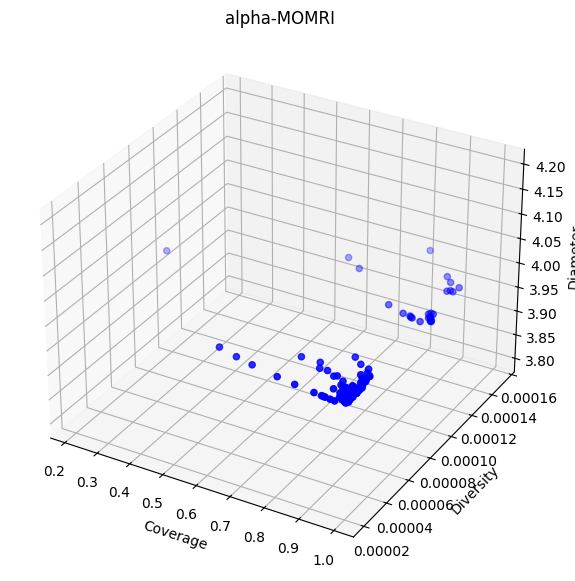

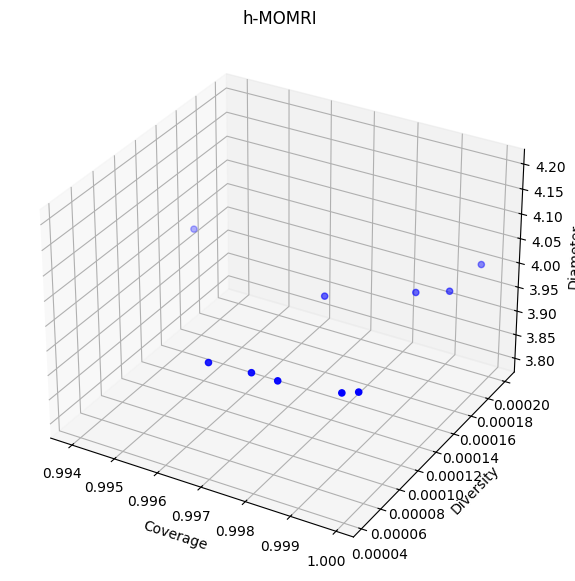

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_data(results, title):
    # Extraire les scores (couverture, diversité, diamètre)
    points = np.array([(plan[1], plan[2], plan[3]) for plan in results])

    # Tracer les points et la frontière de Pareto
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Solutions')
    ax.set_xlabel('Coverage')
    ax.set_ylabel('Diversity')
    ax.set_zlabel('Diameter')
    ax.set_title(title)


plot_data(alpha_momri_results, title="alpha-MOMRI")
plot_data(h_momri_results, title="h-MOMRI")